{'01': 389, '11': 381, '00': 60, '10': 170}


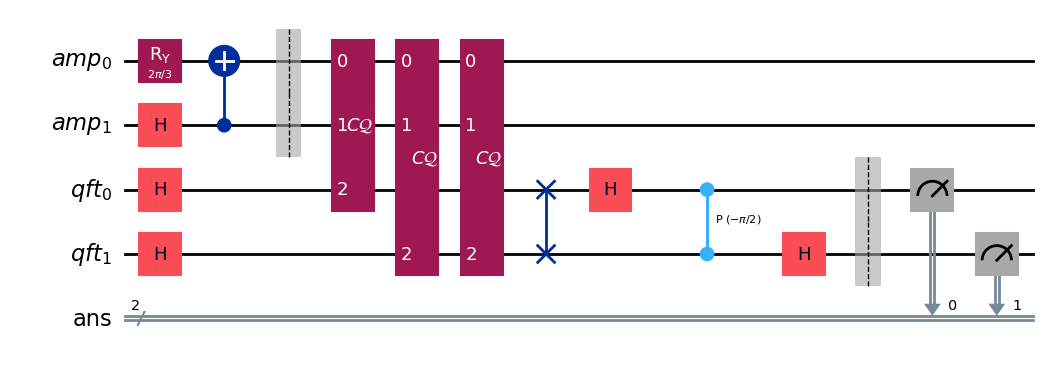

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram
import numpy as np

qr_amp = QuantumRegister(2, name='amp')
qr_qft = QuantumRegister(2, name='qft')
c_ans = ClassicalRegister(2, name='ans')
circuit = QuantumCircuit(qr_amp, qr_qft, c_ans)

# cQ 関数
def cq(circuit, amp, c):
    qr_cq = QuantumRegister(3)
    circuit_cq = QuantumCircuit(qr_cq, name='$C\\mathcal{Q}$')

    # UΨ_0
    circuit_cq.cx(2, 0)
    circuit_cq.cz(2, 0)
    circuit_cq.cz(2, 1)
    circuit_cq.cx(2, 0)

    # UΨ
    circuit_cq.ccx(2, 1, 0)
    circuit_cq.ch(2, 1)
    circuit_cq.cry(-2 * np.pi / 3, 2, 0)

    circuit_cq.cx(2, 0)
    circuit_cq.cx(2, 1)

    circuit_cq.h(1)
    circuit_cq.ccx(2, 0, 1)
    circuit_cq.h(1)

    circuit_cq.cx(2, 1)
    circuit_cq.cx(2, 0)

    circuit_cq.cry(2 * np.pi / 3, 2, 0)
    circuit_cq.ch(2, 1)
    circuit_cq.ccx(2, 1, 0)

    sub_inst = circuit_cq.to_instruction()
    circuit.append(sub_inst, [amp[0], amp[1], c])

# 初期状態 A
circuit.ry(2 * np.pi / 3, qr_amp[0])
circuit.h(qr_amp[1])
circuit.cx(qr_amp[1], qr_amp[0])

circuit.barrier(qr_amp)

# 初期化
circuit.h(qr_qft)

# 振幅増幅
cq(circuit, qr_amp, qr_qft[0])

for i in range(2):
    cq(circuit, qr_amp, qr_qft[1])

# 逆量子フーリエ変換
circuit.swap(qr_qft[0], qr_qft[1])
circuit.h(qr_qft[0])
circuit.cp(-np.pi / 2, qr_qft[0], qr_qft[1])
circuit.h(qr_qft[1])

circuit.barrier(qr_qft)

# 測定
circuit.measure(qr_qft, c_ans)

# AerSimulatorを使用したシミュレーション
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

# 結果の取得と表示
answer = result.get_counts(circuit)
print(answer)
plot_histogram(answer)

# 回路図を描画
circuit.draw(output='mpl', fold=50)


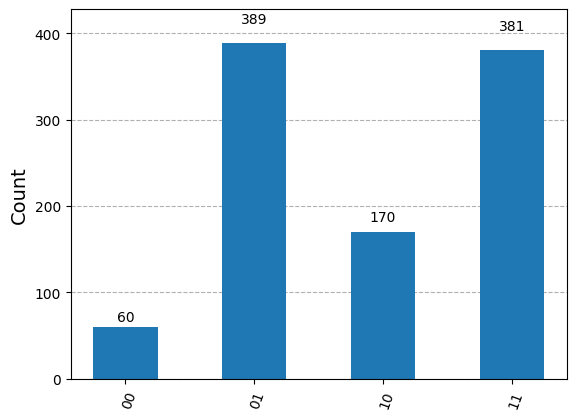

In [2]:
plot_histogram(answer)